# Song Prediction Dataset Analysis
[UC Irvine machine Learning Repository - YearPredictionMSD](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd#)  
After downloading `YearPredictionMSD.txt`, I renamed it to `songs.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
columns = [
    # Classes
    "year", # Years 1922 - 2011

    # Timbre Average
    'ta1', 'ta2', 'ta3', 'ta4', 'ta5', 'ta6',
    'ta7', 'ta8', 'ta9', 'ta10', 'ta11', 'ta12',
    
    # Timbre Covariance
    'tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7', 'tc8', 'tc9', 'tc10',
    'tc11', 'tc12', 'tc13', 'tc14', 'tc15', 'tc16', 'tc17', 'tc18', 'tc19', 'tc20',
    'tc21', 'tc22', 'tc23', 'tc24', 'tc25', 'tc26', 'tc27', 'tc28', 'tc29', 'tc30',
    'tc31', 'tc32', 'tc33', 'tc34', 'tc35', 'tc36', 'tc37', 'tc38', 'tc39', 'tc40',
    'tc41', 'tc42', 'tc43', 'tc44', 'tc45', 'tc46', 'tc47', 'tc48', 'tc49', 'tc50',
    'tc51', 'tc52', 'tc53', 'tc54', 'tc55', 'tc56', 'tc57', 'tc58', 'tc59', 'tc60',
    'tc61', 'tc62', 'tc63', 'tc64', 'tc65', 'tc66', 'tc67', 'tc68', 'tc69', 'tc70',
    'tc71', 'tc72', 'tc73', 'tc74', 'tc75', 'tc76', 'tc77', 'tc78'
]

df = pd.read_csv("./songs.csv", names=columns)
df.head()

,year,ta1,ta2,ta3,ta4,ta5,ta6,ta7,ta8,ta9,...,tc69,tc70,tc71,tc72,tc73,tc74,tc75,tc76,tc77,tc78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [3]:
feature_cols = columns[1:]

X = df.loc[:, feature_cols]
y = df.year

## Principal Components Analysis (PCA)
Followed example from [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html?highlight=iris)  
[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)

In [4]:
X_reduced = PCA().fit_transform(X)

/home/michael/projects/data-science/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


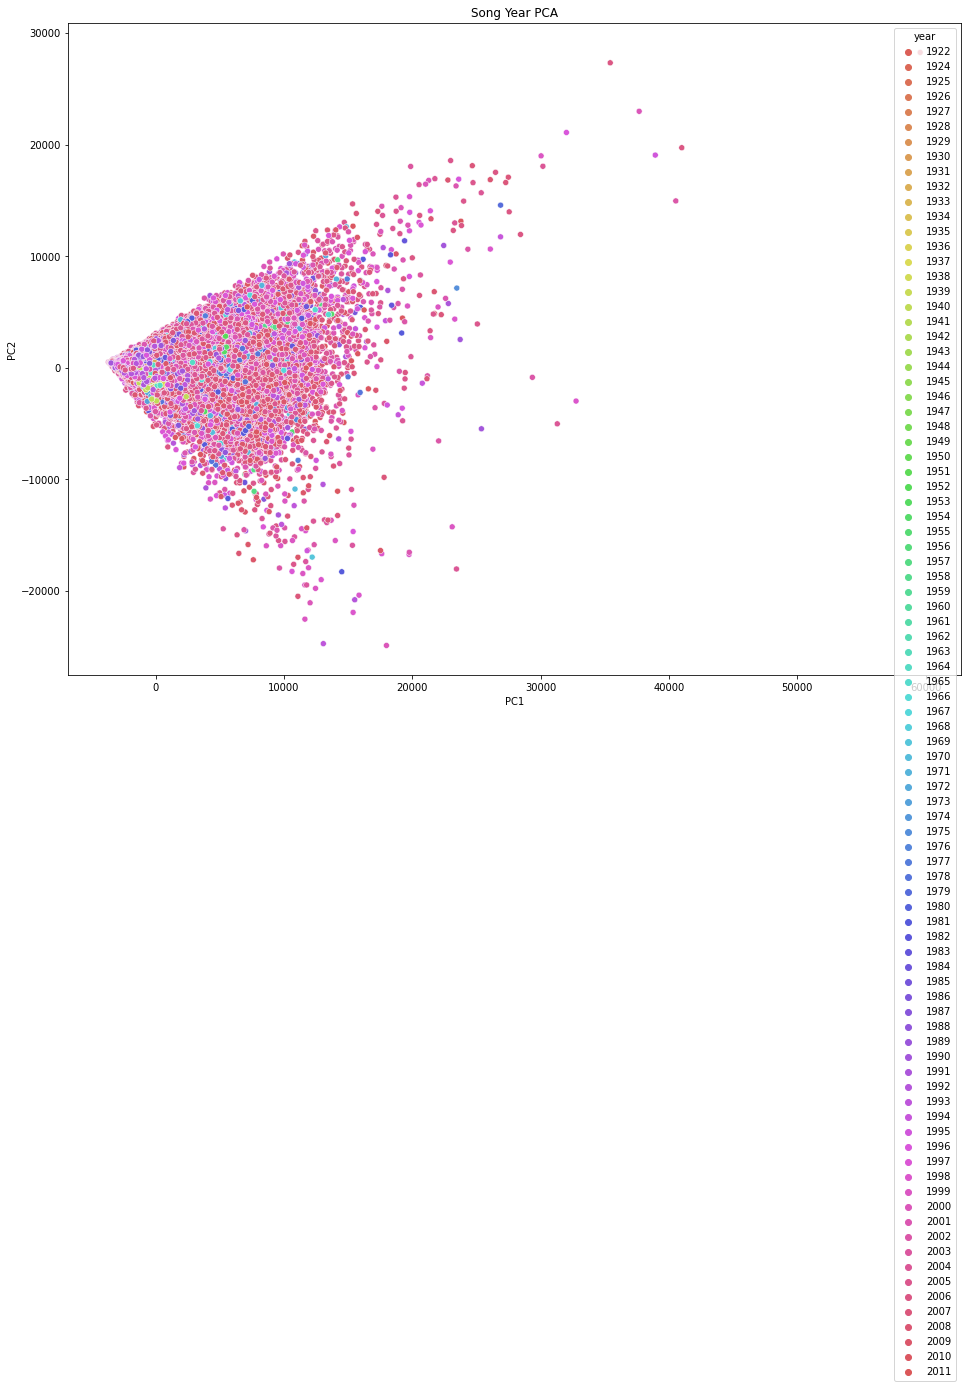

In [5]:
# PCA Scatter Plot
plt.figure(figsize=[16,12])
p = sns.scatterplot(
    x=X_reduced[:,0],
    y=X_reduced[:,1],
    hue=df.year,
    palette=sns.color_palette("hls", 89),
    )

p.set(title="Song Year PCA", xlabel="PC1", ylabel="PC2")
plt.show()

## Multidimensional Scaling (MDS)
Followed example from [towardsdatascience.com](https://towardsdatascience.com/visualize-multidimensional-datasets-with-mds-64d7b4c16eaa)  
[sklearn.manifold.MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html?highlight=multidimensional%20scaling)

In [6]:
# Normalize Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Generate 2 Dimensional Dataset
# X_transformed = MDS(n_components=2, random_state=0).fit_transform(X_scaled)

In [7]:
# MDS Scatter Plot
# plt.figure(figsize=[16,12])
# sns.scatterplot(
#     x=X_transformed[:,0],
#     y=X_transformed[:,1],
#     hue=df.year,
#     palette=sns.color_palette("hls", 89),
#     ).set(title="Song Year MDS")
# plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE)
Followed example from [datatechnotes.com](https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html)  
[sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=multidimensional%20scaling)

In [8]:
# Transform data
# X_transformed = TSNE(n_components=2, random_state=314159, n_iter=250, n_iter_without_progress=50).fit_transform(X)

In [9]:
# t-SNE Scatter Plot
# plt.figure(figsize=[8,6])
# sns.scatterplot(
#     data=df,
#     x="comp-1",
#     y="comp-2",
#     hue=df.year,
#     palette=sns.color_palette("hls", 89),
#     ).set(title="Song Year t-SNE")
# plt.show()

# Linear Discriminant Analysis (LDA)
[sklearn.discriminant_analysis.LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)

In [10]:
X_transformed = LinearDiscriminantAnalysis().fit_transform(X, y)

/home/michael/projects/data-science/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


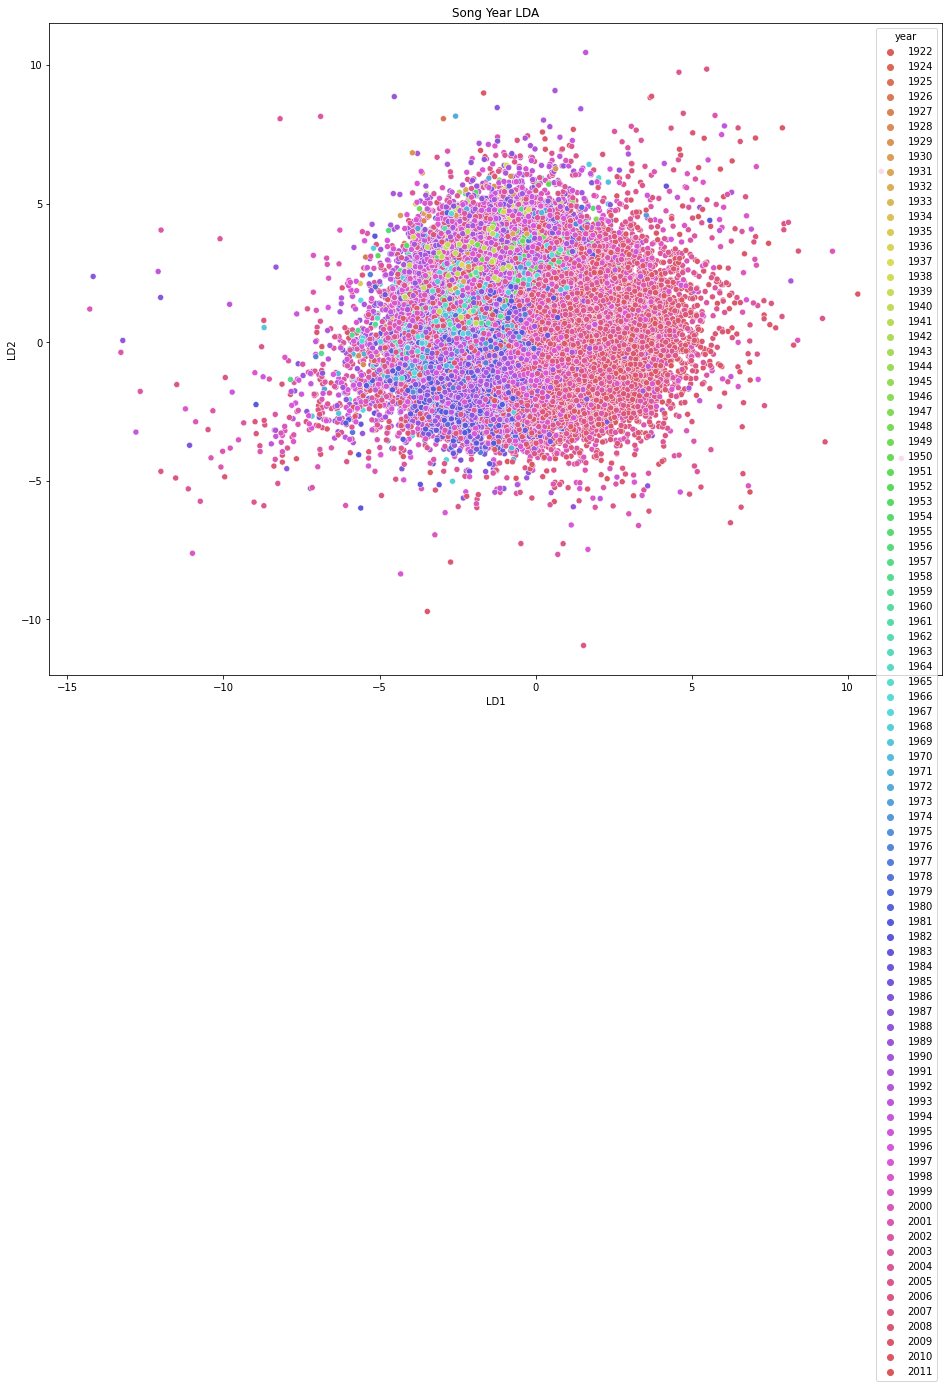

In [11]:
# LDA Scatter Plot
plt.figure(figsize=[16,12])
p = sns.scatterplot(
    x=X_transformed[:,0],
    y=X_transformed[:,1],
    hue=df.year,
    palette=sns.color_palette("hls", 89),
    )

p.set(title="Song Year LDA", xlabel="LD1", ylabel="LD2")
plt.show()